In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter, defaultdict
%matplotlib inline

In [2]:
with open('./data/converted_crime_data/Crime_pass5_no_tracts.csv') as f:
    data = [r for r in csv.reader(f)]

In [3]:
list(enumerate(data[0]))

[(0, 'address'),
 (1, 'apt'),
 (2, 'case'),
 (3, 'primary_offense'),
 (4, 'offense_code'),
 (5, 'offense'),
 (6, 'date_rept'),
 (7, 'date_occu'),
 (8, 'hour_occu'),
 (9, 'date_fnd'),
 (10, 'hour_fnd'),
 (11, 'fid'),
 (12, 'x'),
 (13, 'y')]

In [4]:
data_without_2010_and_2012 = [r for r in data[1:] if not (r[7].startswith('2010') or r[7].startswith('2012'))]

In [5]:
from datetime import datetime

data_by_month = defaultdict(list)
for row in data_without_2010_and_2012:
    date = datetime.strptime(row[7], "%Y-%m-%d")
    data_by_month[date.month].append(date)

In [10]:
data_by_month_days = {
    k: [x.day for x in values]
    for k, values in data_by_month.items()
}

In [7]:
import seaborn as sns

/home/oychang/.virtualenvs/crime/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


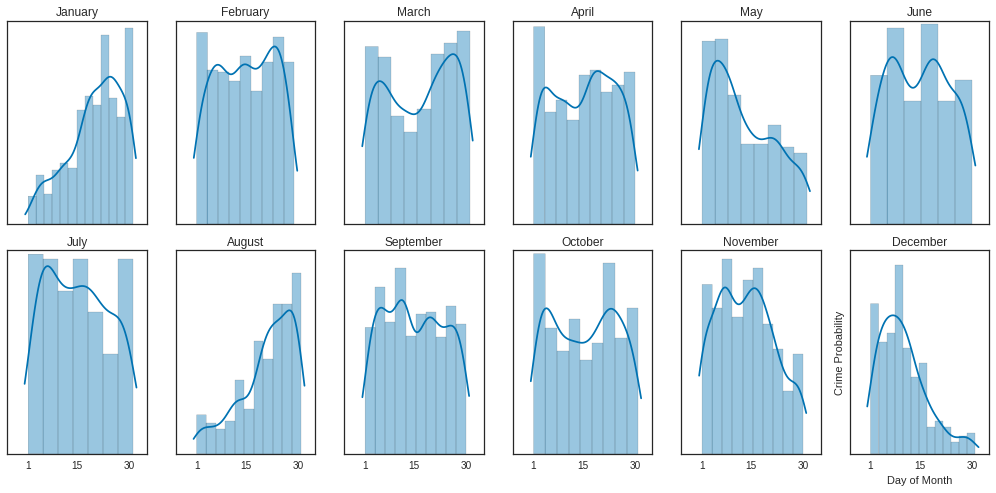

In [11]:
import calendar
sns.set(style="white", palette="colorblind", color_codes=True)
f, axes = plt.subplots(2, 6, figsize=(14,7), sharex=True)
for i, v in enumerate(data_by_month_days.values()):
    month_name = calendar.month_name[i+1]
    res = sns.distplot(list(v), hist=True, ax=axes[i // 6, i % 6])
    res.set_title(month_name)
plt.setp(axes, yticks=[], xticks=[1,15,30])
sns.axlabel(xlabel='Day of Month', ylabel='Crime Probability')
plt.tight_layout()

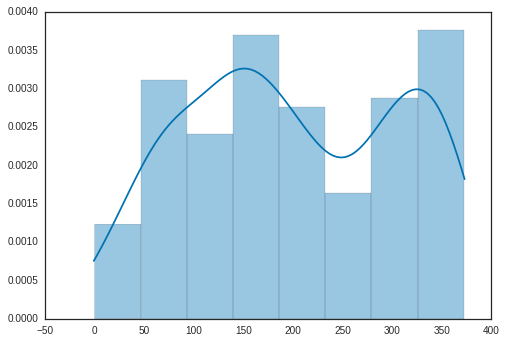

In [17]:
data_by_doy = list(range(366))
for row in data_without_2010_and_2012: 
    date = datetime.strptime(row[7], "%Y-%m-%d")
    data_by_doy[date.timetuple().tm_yday] += 1
sns.distplot(data_by_doy)